In [2]:
import numpy as np
import matplotlib.pyplot as plt
import cv2

from skimage import data, img_as_float
from skimage.restoration import denoise_nl_means, estimate_sigma
from skimage.metrics import peak_signal_noise_ratio
from skimage.util import random_noise

(256, 256)
255


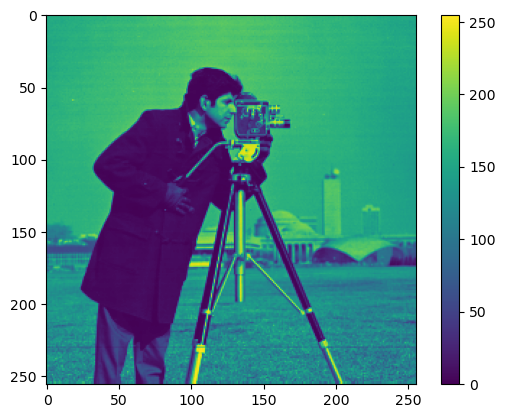

In [4]:
image_number = 3
# dimensionality (N) of subspace = 64
tile_w = 8
 

image = cv2.imread(f"Dataset/Image{image_number}.png")
image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
print(image.shape)
print(np.max(image))
mindim = np.min(image.shape)
image = image[:mindim, :mindim]

plt.imshow(image)
plt.colorbar()
plt.show();

In [5]:
### Demo

estimated noise standard deviation = 0.07690479274470105
PSNR (noisy) = 22.18
PSNR (slow) = 29.42
PSNR (slow, using sigma) = 29.73
PSNR (fast) = 28.92
PSNR (fast, using sigma) = 29.36


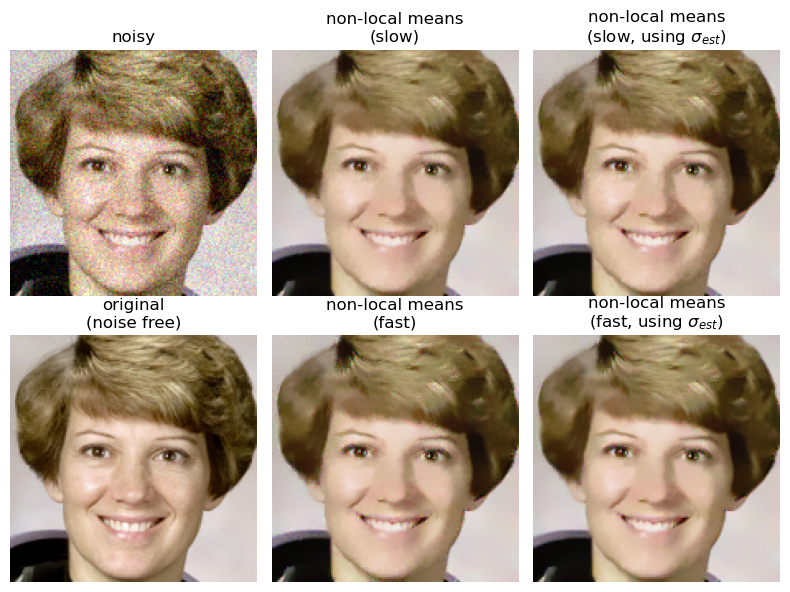

In [6]:

astro = img_as_float(data.astronaut())
astro = astro[30:180, 150:300]

sigma = 0.08
noisy = random_noise(astro, var=sigma**2)

# estimate the noise standard deviation from the noisy image
sigma_est = np.mean(estimate_sigma(noisy, channel_axis=-1))
print(f'estimated noise standard deviation = {sigma_est}')

patch_kw = dict(patch_size=5,      # 5x5 patches
                patch_distance=6,  # 13x13 search area
                channel_axis=-1)

# slow algorithm
denoise = denoise_nl_means(noisy, h=1.15 * sigma_est, fast_mode=False,
                           **patch_kw)

# slow algorithm, sigma provided
denoise2 = denoise_nl_means(noisy, h=0.8 * sigma_est, sigma=sigma_est,
                            fast_mode=False, **patch_kw)

# fast algorithm
denoise_fast = denoise_nl_means(noisy, h=0.8 * sigma_est, fast_mode=True,
                                **patch_kw)

# fast algorithm, sigma provided
denoise2_fast = denoise_nl_means(noisy, h=0.6 * sigma_est, sigma=sigma_est,
                                 fast_mode=True, **patch_kw)

fig, ax = plt.subplots(nrows=2, ncols=3, figsize=(8, 6),
                       sharex=True, sharey=True)

ax[0, 0].imshow(noisy)
ax[0, 0].axis('off')
ax[0, 0].set_title('noisy')
ax[0, 1].imshow(denoise)
ax[0, 1].axis('off')
ax[0, 1].set_title('non-local means\n(slow)')
ax[0, 2].imshow(denoise2)
ax[0, 2].axis('off')
ax[0, 2].set_title('non-local means\n(slow, using $\\sigma_{est}$)')
ax[1, 0].imshow(astro)
ax[1, 0].axis('off')
ax[1, 0].set_title('original\n(noise free)')
ax[1, 1].imshow(denoise_fast)
ax[1, 1].axis('off')
ax[1, 1].set_title('non-local means\n(fast)')
ax[1, 2].imshow(denoise2_fast)
ax[1, 2].axis('off')
ax[1, 2].set_title('non-local means\n(fast, using $\\sigma_{est}$)')

fig.tight_layout()

# print PSNR metric for each case
psnr_noisy = peak_signal_noise_ratio(astro, noisy)
psnr = peak_signal_noise_ratio(astro, denoise)
psnr2 = peak_signal_noise_ratio(astro, denoise2)
psnr_fast = peak_signal_noise_ratio(astro, denoise_fast)
psnr2_fast = peak_signal_noise_ratio(astro, denoise2_fast)

print(f'PSNR (noisy) = {psnr_noisy:0.2f}')
print(f'PSNR (slow) = {psnr:0.2f}')
print(f'PSNR (slow, using sigma) = {psnr2:0.2f}')
print(f'PSNR (fast) = {psnr_fast:0.2f}')
print(f'PSNR (fast, using sigma) = {psnr2_fast:0.2f}')

plt.show()

A trial image for understanding the scikit image package

<class 'numpy.ndarray'>
(150, 150, 3)
1.0


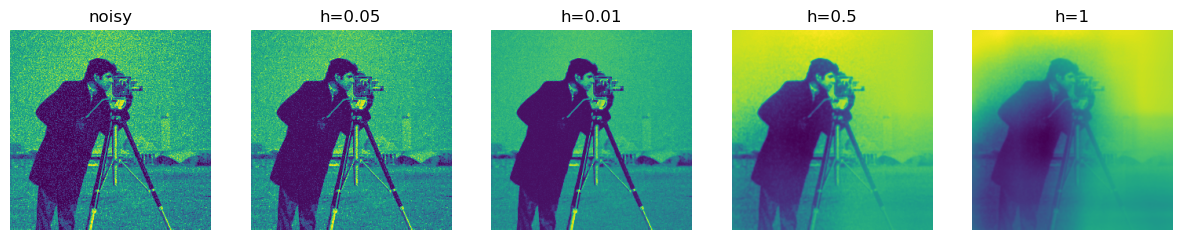

In [26]:
print(type(astro))
print(astro.shape)
print(np.max(astro))

sigma = 0.1
sigmaest =0.01
patch_kw = dict(patch_size=5,      # 5x5 patches
                patch_distance=60,  # 121x121 search area
                channel_axis = -1,
                fast_mode=False)

noisy_image = random_noise(image, var=sigma**2)
noisy_image = noisy_image[:,:, np.newaxis]

# slow algorithm
denoise_img1 = denoise_nl_means(noisy_image, h=0.05, **patch_kw)
denoise_img2 = denoise_nl_means(noisy_image, h=0.1, **patch_kw)
denoise_img3 = denoise_nl_means(noisy_image, h=0.5, **patch_kw)
denoise_img4 = denoise_nl_means(noisy_image, h=1, **patch_kw)

fig, ax = plt.subplots(nrows=1, ncols=5, figsize=(15, 8),
                       sharex=True, sharey=True)
ax[0].imshow(noisy_image)
ax[0].axis('off')
ax[0].set_title('noisy')
ax[1].imshow(denoise_img1)
ax[1].axis('off')
ax[1].set_title('h=0.05')
ax[2].imshow(denoise_img2)
ax[2].axis('off')
ax[2].set_title('h=0.01')
ax[3].imshow(denoise_img3)
ax[3].axis('off')
ax[3].set_title('h=0.5')
ax[4].imshow(denoise_img4)
ax[4].axis('off')
ax[4].set_title('h=1')

plt.show();

What if NLM is applied iteratively starting from a low h?
Here 'low h' means an h that is insuffiecient to denoise at a single NLM step. 

In [27]:
def getIterDenoised(img, h_iter, patch_kw, numiter):
    imlist = [img]
    for i in range (numiter):
        print(img.shape)
        img = img[:,:,np.newaxis]
        img = denoise_nl_means(	img, h=h_iter, **patch_kw)
        imlist.append(img)
        
    return imlist

itered20_h10 = getIterDenoised(noisy_image[:,:,-1], 0.05, patch_kw, 20)


(256, 256)
(256, 256)
(256, 256)
(256, 256)
(256, 256)
(256, 256)
(256, 256)
(256, 256)
(256, 256)
(256, 256)
(256, 256)
(256, 256)
(256, 256)
(256, 256)
(256, 256)
(256, 256)
(256, 256)
(256, 256)
(256, 256)
(256, 256)


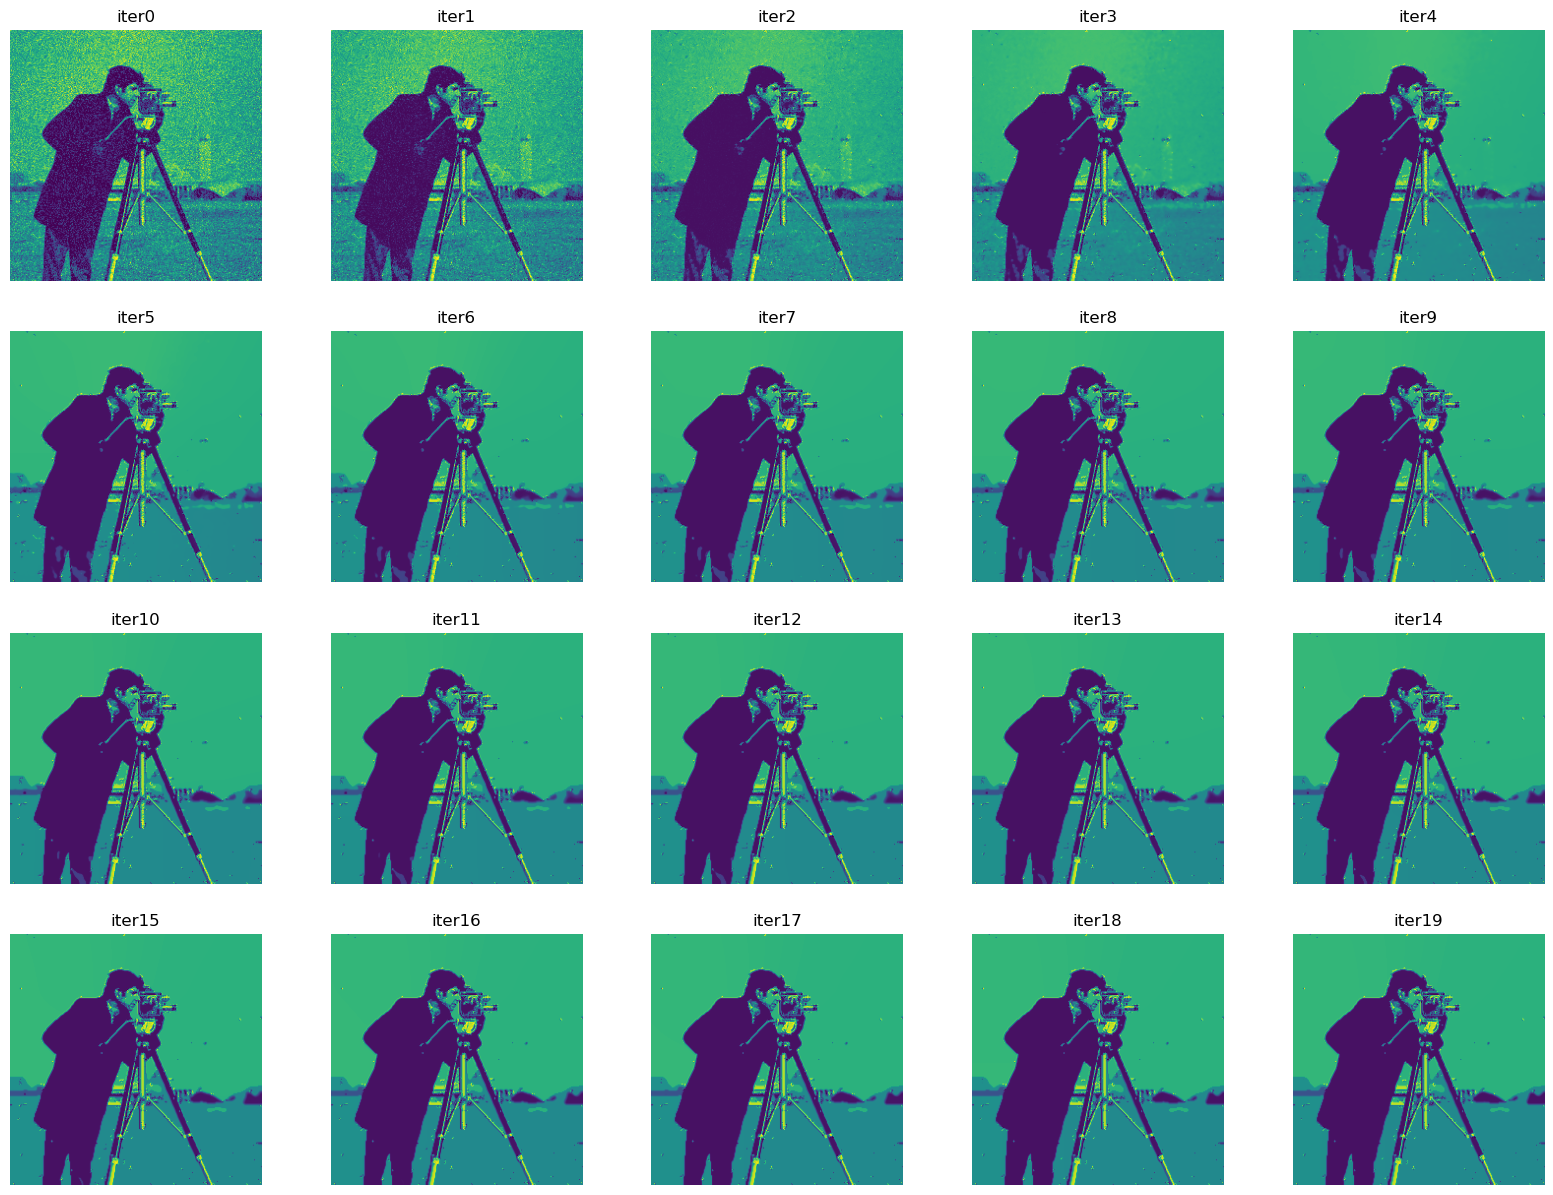

In [28]:
nrows =4
ncols= 5
fig, ax = plt.subplots(nrows=nrows, ncols=ncols, figsize=(20, 15),
                       sharex=True, sharey=True)
for i in range(nrows):
    for j in range(ncols):
        idx = i*5 + j*1
        ax[i,j].imshow(itered20_h10[idx])
        ax[i,j].axis('off')
        ax[i,j].set_title('iter%d'%(idx))